In [11]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/Social_Network_Ads.csv')
print(df.head)
print(df.columns)
df = df.dropna()



<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>
Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [3]:
X=df[['Gender', 'Age', 'EstimatedSalary']]
X['Gender']=X['Gender'].astype('category').cat.codes
#X=np.array(X)
#X=X.reshape(-1,1)
y=df[['Purchased']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

X_test = sc_X.transform(X_test)



C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuu

In [4]:
logreg=linear_model.LogisticRegression()
logreg.fit(X_train,y_train)

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [5]:
print(logreg.coef_)
print(logreg.intercept_)

[[0.09186917 2.07997332 1.11053785]]
[-0.93245089]


Actual purchase count  143 400
Predicted purchase count  29 100


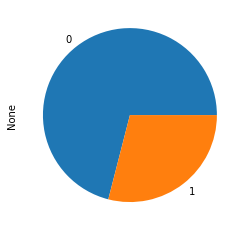

Accuracy is %s 91.0


In [6]:
gender=0
age=1
estimatedSalary=100
#print(logreg.predict_proba([[gender,age,estimatedSalary]]))

probabilities=logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)
#print(prediction)

print("Actual purchase count ",len(y[y['Purchased']==1]),len(y))
print("Predicted purchase count ",len(y_pred[y_pred==1]),len(y_pred))
buffer=pd.Series(y_pred)
buffer.value_counts().plot(kind='pie')
plt.show()




print("Accuracy is %s",logreg.score(X_test,y_test)*100)

Text(0, 0.5, 'TPR')

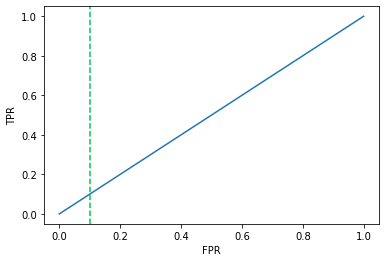

In [7]:
ytrain_pred_probas = logreg.predict_proba(X)[:, 1]   # prob of predict as 1
fpr, tpr, thresholds = roc_curve(y, ytrain_pred_probas)   # precision_recall_curve
roc = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresholds})

_ = plt.figure()
plt.plot(roc.FPR, roc.TPR)
plt.axvline(0.1, color = '#00C851', linestyle = '--')
plt.xlabel("FPR")
plt.ylabel("TPR")

Text(0.5, 257.44, 'Predicted label')

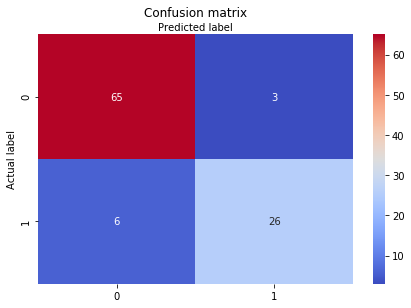

In [8]:
confusion_matrix = confusion_matrix(y_test, y_pred)

class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

(400, 2)


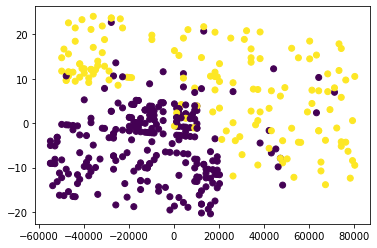

In [9]:
#conclusions - logistic regression is not useable for this dataset.
labels=y['Purchased'].values

pca=PCA(n_components=2)
pca.fit(X)

transformed=pca.transform(X)
print(transformed.shape)

xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=labels)
plt.show()

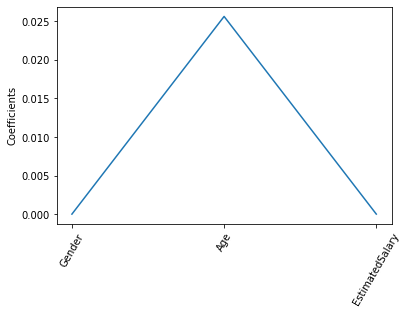

In [12]:
names=['Gender', 'Age', 'EstimatedSalary']
lasso=Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_

_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)),names,rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

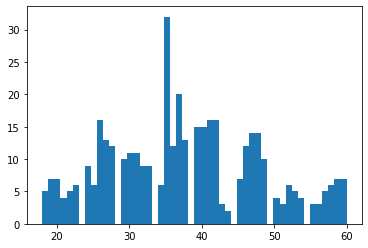

In [15]:
plt.hist(X['Age'], bins=50)
plt.show()

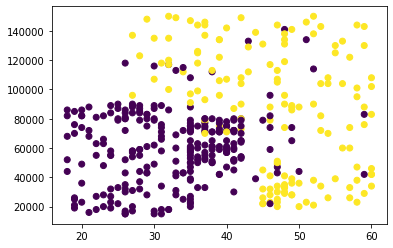

In [17]:
plt.scatter(X['Age'],X['EstimatedSalary'],c=labels)
plt.show()